# 5.1

In [37]:
import numpy as np
n = 144
B, C, H, W = 2, 3, 4, 6
img = np.arange(n)
img = img.reshape(B, C, H, W)
img.shape

(2, 3, 4, 6)

In [38]:
def patchify_image(img, patch_size):
    B, C, H, W = img.shape
    p_h, p_w = patch_size
    assert H % p_h == 0 and W % p_w == 0, "Height and Width must be divisible by patch size"
    img = img.reshape(B, C, H // p_h, p_h, W // p_w, p_w)
    img = img.transpose(0, 2, 4, 1, 3, 5)
    patches = img.reshape(B, (H // p_h) * (W // p_w), C, p_h, p_w)
    return patches
patches = patchify_image(img, (2, 3))
patches.shape

(2, 4, 3, 2, 3)

# 5.2

In [39]:
# read an 128*144 image to numpy array
import cv2
img = cv2.imread('testimg.jpg')
img.shape
img_resized = cv2.resize(img, (128, 144))
img_array = np.transpose(img_resized, (2, 0, 1))  # (H, W, C) -> (C, H, W)
img_array = img_array[np.newaxis, ...]

print(img_array.shape)
img_array = patchify_image(img_array, (12, 16))
# save the patched images
import os
def save_patches(patches, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    B, num_patches, C, p_h, p_w = patches.shape
    for b in range(B):
        for i in range(num_patches):
            patch = patches[b, i]
            patch_filename = os.path.join(output_dir, f'patch_b{b}_i{i}.png')
            patch = np.transpose(patch, (1, 2, 0))  # (C, H, W) -> (H, W, C)
            cv2.imwrite(patch_filename, patch)
output_dir = 'patches'
save_patches(img_array, output_dir)

(1, 3, 144, 128)


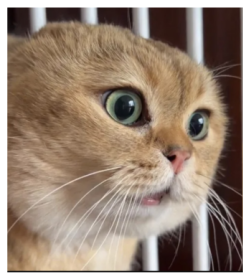

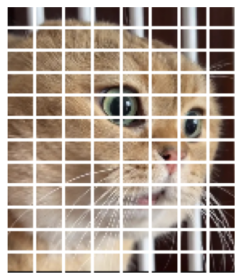

In [47]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
def visualize_patches_in_grid(
    patches, 
    original_height=144, 
    original_width=128, 
    patch_size=(12, 16), 
    spacing=2, 
    output_path='patched_grid.png'
):
    B, num_patches, C, p_h, p_w = patches.shape
    patch_rows = original_height // p_h
    patch_cols = original_width // p_w
    grid_height = patch_rows * p_h + (patch_rows - 1) * spacing
    grid_width = patch_cols * p_w + (patch_cols - 1) * spacing
    canvas = np.zeros((grid_height, grid_width, C), dtype=np.uint8)
    # 将canvas初始值设为255
    canvas.fill(255)
    
    for i in range(num_patches):
        row = i // patch_cols
        col = i % patch_cols
        patch = patches[0, i]  
        patch = np.transpose(patch, (1, 2, 0))  
        start_y = row * (p_h + spacing)
        start_x = col * (p_w + spacing)
        canvas[start_y:start_y + p_h, start_x:start_x + p_w, :] = patch
    cv2.imwrite(output_path, canvas)
    return canvas
result_canvas = visualize_patches_in_grid(
    patches=img_array,
    original_height=144, 
    original_width=128, 
    patch_size=(12, 16), 
    spacing=2, 
    output_path='patched_grid.png'
)
import matplotlib.image as mpimg
origin_imd = mpimg.imread('testimg.jpg')
plt.imshow(origin_imd)
plt.axis('off')  
plt.show()

img = mpimg.imread('patched_grid.png')
plt.imshow(img)
plt.gca().set_facecolor('white')

plt.axis('off')  
plt.show()
